## Step 3: Data Preprocessing:

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
# Reading the dataset
data = pd.read_csv('adult1.csv')

In [3]:
# Preview dataset
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [4]:
# Dimensions of the dataset
data.shape

(32561, 15)

In [5]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# Statistical Summary
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### 3.1: Fixing '?' values in the dataset

In [4]:
data = data.replace('?', np.nan)

In [8]:
# Checking null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
income             0.0 %
dtype: object

In [6]:
columns_with_nan = ['workclass', 'occupation', 'native_country']

In [7]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

### 3.3: Feature Selection

In [13]:
X = data.drop('income', axis=1)
Y = data['income']

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [15]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [16]:
feature_imp = selector.feature_importances_

In [17]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [19]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital_loss', 'native_country'], axis=1)

### 3.4: Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [22]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [24]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [25]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [26]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

### 3.6: Creating a train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [30]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [31]:
Y_pred_log_reg = log_reg.predict(X_test)

### 4.2: KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [33]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [34]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Support Vector Classifier

In [35]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [36]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [37]:
Y_pred_svc = svc.predict(X_test)

### 4.4: Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [39]:
nb.fit(X_train, Y_train)

GaussianNB()

In [40]:
Y_pred_nb = nb.predict(X_test)

### 4.5: Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [42]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 4.6: Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [45]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [46]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.7: XGB Classifier

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [48]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
Y_pred_xgb = xgb.predict(X_test)

## Step 5: Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [51]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.25
F1 score: 75.08


In [52]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.42
F1 score: 84.43


In [53]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.58
F1 score: 82.56


In [54]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.68
F1 score: 48.42


In [55]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.61
F1 score: 92.01


In [56]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93


In [57]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.09
F1 score: 86.57


## Step 6: Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [60]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [61]:
rf_tuned = RandomForestClassifier(random_state=42)

In [62]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [63]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [64]:
rf_cv.best_score_

0.9131271105332539

In [65]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [66]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [67]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [68]:
Y_pred_rf_best = rf_best.predict(X_test)

In [69]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

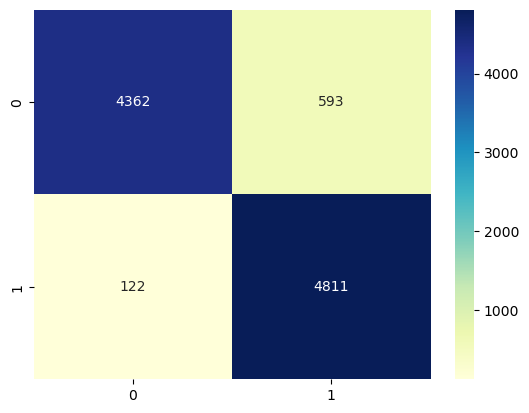

In [71]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4955
           1       0.89      0.98      0.93      4933

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



### Conclusion:


- In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

- A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.